<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Сгенирируем классификацию (случайный датасет)

In [32]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

# Pregnancies - количество беременностей
# Glucose - уровень глюкозы в крови
# BloodPressure - уровень артериального давления
# SkinThickness - толщина кожной складки
# Insulin - уровень инсулина
# BMI - индекс массы тела
# DiabetesPedigreeFunction - вероятность диабета по генетической предрасположенности
# Age - возраст пациента
# Outcome - результат теста (0 - нет диабета, 1 - диабет) ///целевая переменная

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Информация о датасете

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Подготовка датасета

In [35]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [43]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000)

logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [37]:
#значимость признаков
_ = [print(k, f"{v:.3f}") for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.122
Glucose 0.035
BloodPressure -0.013
SkinThickness 0.001
Insulin -0.001
BMI 0.090
DiabetesPedigreeFunction 0.868
Age 0.015


In [38]:
#Свободный коэффициент
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.36470855]


Вектор предсказанных значений целевой переменной

In [39]:
y_pred = logistic.predict(X)

print(f"{'True':<12} {'Predicted'}")
print("="*30)
_ = [print(f"{a:<12} {b}") for a, b in list(zip(y, y_pred))[:10]]

True         Predicted
1            1
0            0
1            1
0            0
1            1
0            0
1            0
0            1
1            1
1            0


In [40]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]])

<Axes: >

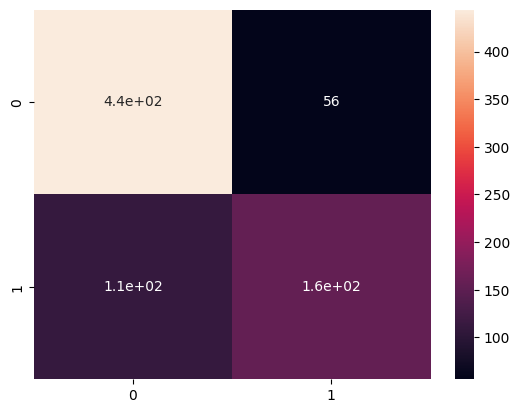

In [41]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Доля правильно распознаных объектов

In [45]:
logistic.score(X, y)

0.78125

In [49]:
metrics.accuracy_score(y, y_pred)

0.78125

Полиномиальная модель

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X)
X_poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [58]:
polynomial = LogisticRegression(max_iter=10000)
polynomial.fit(X_poly, y)
y_pred_poly = polynomial.predict(X_poly)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
polynomial.score(X_poly, y)

0.79296875